In [ ]:
# This code requires edit of the GEOID_CODES to match areas you wish to compare
# in this example those are to be used for 
# Habitat suitability analysis for the Colorado Blue Spruce

# Areas of focus (find GEOID codes vis https://www.census.gov/library/reference/code-lists/ansi.html#cou)
# Primary - Boulder County, Colorado  (GEOID 08013)
# Secondary, based upon similar characteristics to Boulder County

# Taos County, New Mexico (GEOID 35055)
# Elevation: 5,000 to 13,000 feet.
# Climate: Cold winters and monsoon-driven precipitation.
# Features: Shares a focus on natural land conservation and mountainous terrain.

# Albany County, Wyoming (GEOID 56001)
# Elevation: Ranges from around 5,000 to 13,000 feet.
# Climate: Similar to Boulder County with cold winters and a combination of alpine and montane zones.
# Vegetation: Forested areas with suitable conditions for blue spruce, particularly around the Medicine Bow Range.
# Land Use: Mixed urban (Laramie) and wilderness areas like the Medicine Bow National Forest, which supports blue spruce.

# First, download and unzip Census county boundaries 
# https://www2.census.gov/geo/tiger/TIGER2024/COUNTY/tl_2024_us_county.zip

# after you run this code to select the county shapefiles, delete the overall county shapefile as it will
# be too large to store in the classroom storage area


Reading shapefile...
Saved shapefile for GEOID 08013 in 08013.
Saved shapefile for GEOID 35055 in 35055.
Saved shapefile for GEOID 56001 in 56001.
Plotting shapefile for GEOID 08013...


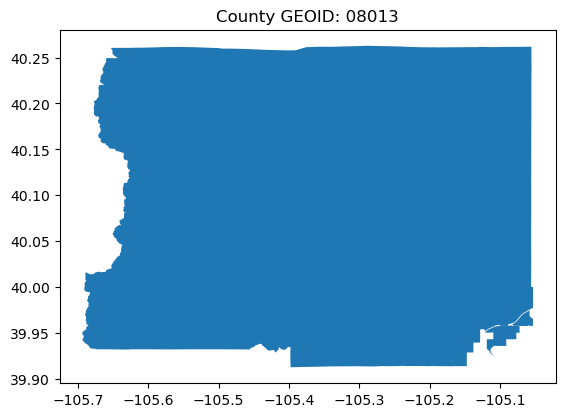

Plotting shapefile for GEOID 35055...


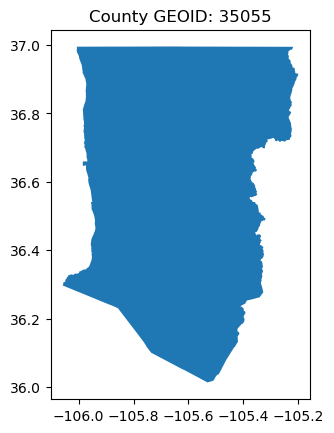

Plotting shapefile for GEOID 56001...


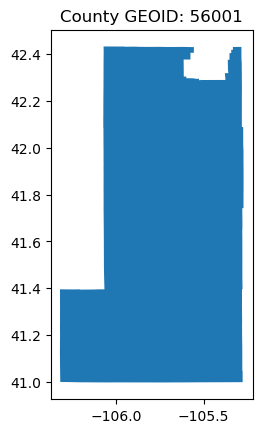

In [14]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Define GEOID codes directly in the code
GEOID_CODES = ['08013', '35055', '56001']

# Step 2: Process counties based on GEOID codes
def process_counties():
    shapefile = "tl_2024_us_county.shp"
    if not os.path.exists(shapefile):
        print(f"Shapefile {shapefile} not found.")
        return

    # Read the shapefile
    print("Reading shapefile...")
    gdf = gpd.read_file(shapefile)

    # Process each GEOID code
    for geoid in GEOID_CODES:
        county_gdf = gdf[gdf["GEOID"] == geoid]
        if county_gdf.empty:
            print(f"No county found for GEOID code {geoid}.")
            continue

        # Create subdirectory named after the GEOID
        directory_name = f"{geoid}"
        os.makedirs(directory_name, exist_ok=True)

        # Save the county shapefile in the subdirectory
        output_shapefile = os.path.join(directory_name, f"{geoid}.shp")
        county_gdf.to_file(output_shapefile)
        print(f"Saved shapefile for GEOID {geoid} in {directory_name}.")

# Step 3: Plot each county shapefile
def plot_counties():
    for geoid in GEOID_CODES:
        directory_name = f"{geoid}"
        shapefile_path = os.path.join(directory_name, f"{geoid}.shp")
        if not os.path.exists(shapefile_path):
            print(f"Shapefile for GEOID {geoid} not found in {directory_name}.")
            continue

        # Load and plot the shapefile
        print(f"Plotting shapefile for GEOID {geoid}...")
        county_gdf = gpd.read_file(shapefile_path)
        county_gdf.plot()
        plt.title(f"County GEOID: {geoid}")
        plt.show()

# Main function to run the steps
def main():
    process_counties()
    plot_counties()

if __name__ == "__main__":
    main()
